In [8]:
import numpy as np
from sklearn.svm import LinearSVC, SVC
import os
import pickle
import copy
import matplotlib.pyplot as plt
import sklearn
import matplotlib

In [2]:
dim_fereastra_patrata = 96
latime_fereastra_dreptunghi = 96
inaltime_fereastra_dreptunghi = 64
dim_celuala_hog_patrat = 12
dim_celula_hog_dreptunghi = 12

In [3]:
def make_train_examples(descriptori_pozitivi, descriptori_negativi):
    date_train = np.concatenate((descriptori_pozitivi,descriptori_negativi))
    etichete_train = np.concatenate((np.ones(descriptori_pozitivi.shape[0]),np.zeros(descriptori_negativi.shape[0])))
    return date_train, etichete_train

In [4]:
def antreneazaSVC(fisier_salvare,training_examples, train_labels, width_window,height_window,dim_hog_cell,personaj=''):
    svm_file_name = os.path.join(fisier_salvare,'%s_best_model_l%d_h%d_dimcelula%d' %
                                 (personaj,width_window, height_window,dim_hog_cell))
    # if os.path.exists(svm_file_name):
    #     self.best_model = pickle.load(open(svm_file_name, 'rb'))
    #     return
    name=fisier_salvare.split('/')[-1]
    print(name)
    best_accuracy = 0
    best_c = 0
    best_model = None
    Cs = [1]
    for c in Cs:
        print(f'Antrenam un clasificator pentru {name} si pt personajul {personaj} pentru c=%f' % c)
        # model = LinearSVC(C=c)
        model = SVC(C=c, kernel='rbf')
        model.fit(training_examples, train_labels)
        acc = model.score(training_examples, train_labels)
        print(acc)
        if acc > best_accuracy:
            best_accuracy = acc
            best_c = c
            best_model = copy.deepcopy(model)

    print('Performanta clasificatorului optim pt c = %f' % best_c)
    # salveaza clasificatorul
    pickle.dump(best_model, open(svm_file_name + '.pkl', 'wb'))

    # vizualizeaza cat de bine sunt separate exemplele pozitive de cele negative dupa antrenare
    # ideal ar fi ca exemplele pozitive sa primeasca scoruri > 0, iar exemplele negative sa primeasca scoruri < 0
    scores = best_model.decision_function(training_examples)
  
    positive_scores = scores[train_labels > 0]
    negative_scores = scores[train_labels <= 0]


    plt.plot(np.sort(positive_scores))
    plt.plot(np.zeros(len(positive_scores)))
    plt.plot(np.sort(negative_scores))
    plt.xlabel('Nr example antrenare')
    plt.ylabel('Scor clasificator')
    plt.title('Distributia scorurilor clasificatorului pe exemplele de antrenare')
    plt.legend(['Scoruri exemple pozitive', '0', 'Scoruri exemple negative'])
    plt.savefig('Distributia_scorurilor_SVC' + '.jpg') 
    

In [5]:
os.makedirs('./SVC/fata_nonfata',exist_ok=True)
os.makedirs('./SVC/personaje',exist_ok=True)

personaje
Antrenam un clasificator pentru personaje si pt personajul dad_ pentru c=1.000000
0.9963291913672707
Performanta clasificatorului optim pt c = 1.000000
personaje
Antrenam un clasificator pentru personaje si pt personajul deedee_ pentru c=1.000000
0.9998818078668684
Performanta clasificatorului optim pt c = 1.000000
personaje
Antrenam un clasificator pentru personaje si pt personajul dexter_ pentru c=1.000000
0.9929161976477895
Performanta clasificatorului optim pt c = 1.000000
personaje
Antrenam un clasificator pentru personaje si pt personajul mom_ pentru c=1.000000
0.9995148080580678
Performanta clasificatorului optim pt c = 1.000000


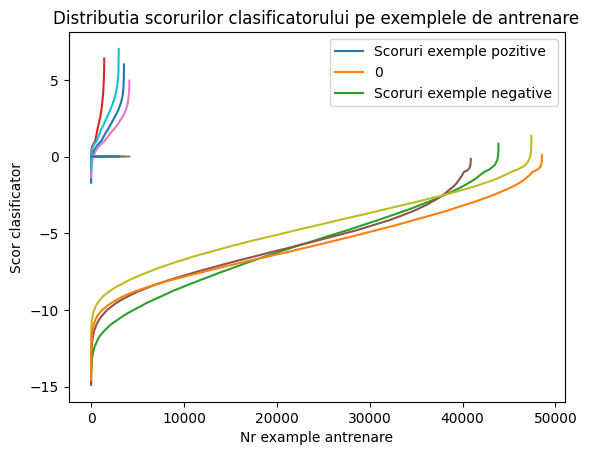

In [8]:
#pentru patrat
#descriptori pozitivi patrat
descriptori_poz_dad = np.load('descriptori_pozitivi/patrat/dad.npy',allow_pickle = True)
descriptori_poz_deedee = np.load(f'descriptori_pozitivi/patrat/deedee.npy',allow_pickle = True)
descriptori_poz_dexter = np.load(f'descriptori_pozitivi/patrat/dexter.npy',allow_pickle = True)
descriptori_poz_mom = np.load(f'descriptori_pozitivi/patrat/mom.npy',allow_pickle = True)
descriptori_poz_unknown = np.load(f'descriptori_pozitivi/patrat/unknown.npy',allow_pickle = True)

descriptori_poz= np.concatenate([descriptori_poz_dad,descriptori_poz_deedee,descriptori_poz_dexter,descriptori_poz_mom,descriptori_poz_unknown])

#descriptori neg patrat
descriptori_neg = np.load(f'descriptori_negativi/patrat/descr_neg.npy',allow_pickle = True)

# SVC patrat fata/non fata
date_train, etichete = make_train_examples(descriptori_poz,descriptori_neg)
antreneazaSVC('./SVC/fata_nonfata',date_train,etichete,dim_fereastra_patrata,dim_fereastra_patrata,dim_celuala_hog_patrat)

# SVC patrat personaj
# dad
descriptori_neg_anti = np.concatenate([descriptori_poz_mom,descriptori_poz_unknown,descriptori_neg])
date_train, etichete= make_train_examples(descriptori_poz_dad,descriptori_neg_anti)
antreneazaSVC('./SVC/personaje',date_train,etichete,dim_fereastra_patrata,dim_fereastra_patrata,dim_celuala_hog_patrat,'dad_')

#deedee
descriptori_neg_anti = np.concatenate([descriptori_poz_unknown,descriptori_neg])
date_train, etichete = make_train_examples(descriptori_poz_deedee,descriptori_neg_anti)
antreneazaSVC('./SVC/personaje',date_train,etichete,dim_fereastra_patrata,dim_fereastra_patrata,dim_celuala_hog_patrat,'deedee_')

# dexter
descriptori_neg_anti = np.concatenate([descriptori_poz_dad,descriptori_poz_mom,descriptori_poz_unknown,descriptori_neg])
date_train, etichete = make_train_examples(descriptori_poz_dexter,descriptori_neg_anti)
antreneazaSVC('./SVC/personaje',date_train,etichete,dim_fereastra_patrata,dim_fereastra_patrata,dim_celuala_hog_patrat,'dexter_')

# mom
descriptori_neg_anti = np.concatenate([descriptori_poz_dad,descriptori_poz_dexter,descriptori_poz_unknown,descriptori_neg])
date_train, etichete = make_train_examples(descriptori_poz_mom,descriptori_neg_anti)
antreneazaSVC('./SVC/personaje',date_train,etichete,dim_fereastra_patrata,dim_fereastra_patrata,dim_celuala_hog_patrat,'mom_')




personaje
Antrenam un clasificator pentru personaje si pt personajul dad_ pentru c=1.000000
0.9970358520749035
Performanta clasificatorului optim pt c = 1.000000
personaje
Antrenam un clasificator pentru personaje si pt personajul deedee_ pentru c=1.000000
0.9958198703030029
Performanta clasificatorului optim pt c = 1.000000
personaje
Antrenam un clasificator pentru personaje si pt personajul dexter_ pentru c=1.000000
0.9848364260880492
Performanta clasificatorului optim pt c = 1.000000
personaje
Antrenam un clasificator pentru personaje si pt personajul mom_ pentru c=1.000000
0.9983663552967788
Performanta clasificatorului optim pt c = 1.000000


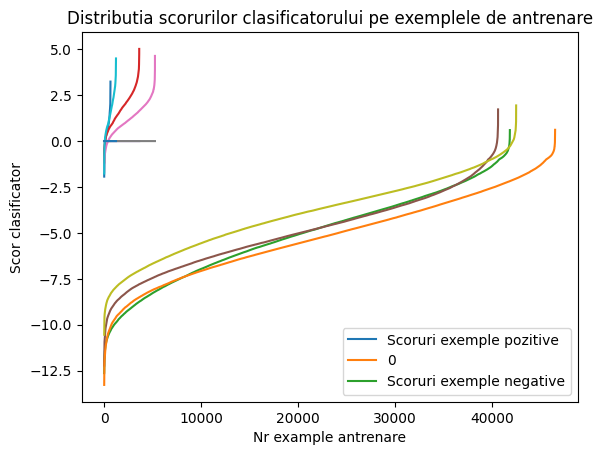

In [9]:
#pentru dreptunghi
#descriptori poz dreptunghi
descriptori_poz_dad = np.load('descriptori_pozitivi/dreptunghi/dad.npy',allow_pickle = True)
descriptori_poz_deedee = np.load('descriptori_pozitivi/dreptunghi/deedee.npy',allow_pickle = True)
descriptori_poz_dexter = np.load('descriptori_pozitivi/dreptunghi/dexter.npy',allow_pickle = True)
descriptori_poz_mom = np.load('descriptori_pozitivi/dreptunghi/mom.npy',allow_pickle = True)
descriptori_poz_unknown = np.load('descriptori_pozitivi/dreptunghi/unknown.npy',allow_pickle = True)

descriptori_poz = np.concatenate([descriptori_poz_dad,descriptori_poz_deedee,descriptori_poz_dexter,descriptori_poz_mom,descriptori_poz_unknown])

#descriptori neg dreptunghi

descriptori_neg= np.load('descriptori_negativi/dreptunghi/descr_neg.npy',allow_pickle=True)

# SVC dreptunghi fata non fata
date_train, etichete = make_train_examples(descriptori_poz,descriptori_neg)
antreneazaSVC('./SVC/fata_nonfata',date_train,etichete,latime_fereastra_dreptunghi,inaltime_fereastra_dreptunghi,dim_celula_hog_dreptunghi)

#SVC dreptunghi personaje
#dad
descriptori_neg_anti = np.concatenate([descriptori_poz_mom,descriptori_poz_unknown,descriptori_neg])
date_train, etichete = make_train_examples(descriptori_poz_dad,descriptori_neg_anti)
antreneazaSVC('./SVC/personaje',date_train,etichete,latime_fereastra_dreptunghi,inaltime_fereastra_dreptunghi,dim_celula_hog_dreptunghi,'dad_')

#deedee

descriptori_neg_anti = np.concatenate([descriptori_poz_unknown,descriptori_neg])
date_train, etichete = make_train_examples(descriptori_poz_deedee,descriptori_neg_anti)
antreneazaSVC('./SVC/personaje',date_train,etichete,latime_fereastra_dreptunghi,inaltime_fereastra_dreptunghi,dim_celula_hog_dreptunghi,'deedee_')

# dexter
descriptori_neg_anti =np.concatenate([descriptori_poz_dad,descriptori_poz_mom,descriptori_poz_unknown,descriptori_neg])
date_train, etichete = make_train_examples(descriptori_poz_dexter,descriptori_neg_anti)
antreneazaSVC('./SVC/personaje',date_train,etichete,latime_fereastra_dreptunghi,inaltime_fereastra_dreptunghi,dim_celula_hog_dreptunghi,'dexter_')

#mom
descriptori_neg_anti = np.concatenate([descriptori_poz_dad,descriptori_poz_dexter,descriptori_poz_unknown,descriptori_neg])
date_train, etichete = make_train_examples(descriptori_poz_mom,descriptori_neg_anti)
antreneazaSVC('./SVC/personaje',date_train,etichete,latime_fereastra_dreptunghi,inaltime_fereastra_dreptunghi,dim_celula_hog_dreptunghi,'mom_')

# 


personaje
Antrenam un clasificator pentru personaje si pt personajul dad_ pentru c=1.000000
0.9921120136810603
Performanta clasificatorului optim pt c = 1.000000
personaje
Antrenam un clasificator pentru personaje si pt personajul deedee_ pentru c=1.000000
0.9999265965255689
Performanta clasificatorului optim pt c = 1.000000
personaje
Antrenam un clasificator pentru personaje si pt personajul dexter_ pentru c=1.000000
0.9958695880071287
Performanta clasificatorului optim pt c = 1.000000
personaje
Antrenam un clasificator pentru personaje si pt personajul mom_ pentru c=1.000000
0.9986186906999388
Performanta clasificatorului optim pt c = 1.000000


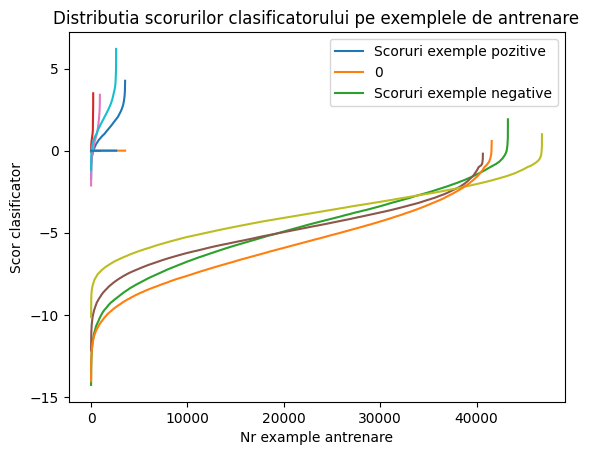

In [10]:
#pentru dreptunghi inalt
#descriptori poz dreptunghi inalt

descriptori_poz_dad = np.load('descriptori_pozitivi/dreptunghi_inalt/dad.npy',allow_pickle = True)
descriptori_poz_deedee = np.load('descriptori_pozitivi/dreptunghi_inalt/deedee.npy',allow_pickle = True)
descriptori_poz_dexter = np.load('descriptori_pozitivi/dreptunghi_inalt/dexter.npy',allow_pickle = True)
descriptori_poz_mom = np.load('descriptori_pozitivi/dreptunghi_inalt/mom.npy',allow_pickle = True)
descriptori_poz_unknown = np.load('descriptori_pozitivi/dreptunghi_inalt/unknown.npy',allow_pickle = True)

#descriptori neg dreptunghi inalt
descriptori_neg= np.load('descriptori_negativi/dreptunghi_inalt/descr_neg.npy',allow_pickle=True)

# SVC dreptunghi inalt pt fata/non fata
descriptori_poz= np.concatenate([descriptori_poz_dad,descriptori_poz_deedee,descriptori_poz_dexter,descriptori_poz_mom,descriptori_poz_unknown])

date_train, etichete= make_train_examples(descriptori_poz,descriptori_neg)
antreneazaSVC('./SVC/fata_nonfata',date_train,etichete,inaltime_fereastra_dreptunghi,latime_fereastra_dreptunghi,dim_celula_hog_dreptunghi)

# SVC dreptunghi inalt personaje  
#dad
descriptori_neg_anti= np.concatenate([descriptori_poz_mom,descriptori_poz_unknown,descriptori_neg])
date_train, etichete = make_train_examples(descriptori_poz_dad,descriptori_neg_anti)
antreneazaSVC('./SVC/personaje',date_train,etichete,inaltime_fereastra_dreptunghi,latime_fereastra_dreptunghi,dim_celula_hog_dreptunghi,'dad_')

# deedee
descriptori_neg_anti = np.concatenate([descriptori_poz_unknown,descriptori_neg])
date_train, etichete = make_train_examples(descriptori_poz_deedee,descriptori_neg_anti)
antreneazaSVC('./SVC/personaje',date_train,etichete,inaltime_fereastra_dreptunghi,latime_fereastra_dreptunghi,dim_celula_hog_dreptunghi,'deedee_')

# dexter
descriptori_neg_anti = np.concatenate([descriptori_poz_dad,descriptori_poz_mom,descriptori_poz_unknown,descriptori_neg])
date_train, etichete = make_train_examples(descriptori_poz_dexter,descriptori_neg_anti)
antreneazaSVC('./SVC/personaje',date_train,etichete,inaltime_fereastra_dreptunghi,latime_fereastra_dreptunghi,dim_celula_hog_dreptunghi,'dexter_')

#mom
descriptori_neg_anti = np.concatenate([descriptori_poz_dexter,descriptori_poz_unknown,descriptori_neg])
date_train, etichete = make_train_examples(descriptori_poz_mom,descriptori_neg_anti)
antreneazaSVC('./SVC/personaje',date_train,etichete,inaltime_fereastra_dreptunghi,latime_fereastra_dreptunghi,dim_celula_hog_dreptunghi,'mom_')



In [ ]:

# print(descriptori_neg.shape)
# print(descriptori_poz.shape)